# Metricas de evaluación para modelos de Machine Learning

In [2]:
def accuracy(y_true, y_pred):
    """
    Funcion que calcula la exactitud
    :param y_true: valores verdaderos
    :param y_pred: valores predichos
    :return: score de exactitud (accuracy)
    """
    #Iniciando un simple contador
    correct_counter = 0
    #loop de los elementos en y_true y y_pred juntos
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            #Si la prediccion es igual al valor verdadero, incrementa el contador
            correct_counter += 1

    return correct_counter/len(y_true)

In [3]:
accuracy([0,1,1,1,0,1,0,0,1], [0,1,1,0,0,0,1,0,1])

0.6666666666666666

#### Las siguientes funciones solo sirven para para clasificaciones binarias.

In [4]:
def true_positive(y_true, y_pred):
    """
    Funcion que calcula los verdaderos positivos
    :param y_true: valores verdaderos
    :param y_pred: valores predichos
    :return: total de verdaderos positivos
    """
    #iniciando
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp +=1

    return tp

In [5]:
def true_negative(y_true, y_pred):
    """
    Funcion que calcula los verdaderos negativos
    :param y_true: valores verdaderos
    :param y_pred: valores predichos
    :return: total de verdaderos negativos
    """
    #iniciando
    tn = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1

    return tn

In [6]:
def false_positive(y_true, y_pred):
    """
    Función que calcula los falsos positivos
    :param y_true: valores verdaderos
    :param y_pred: valores predichos
    :return: total de falsos positivos
    """
    #iniciando
    fp = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1

    return fp

In [7]:
def false_negative(y_true, y_pred):
    """
    Funcion que calcula los falsos positivos
    :param y_true: valores verdaderos
    :param y_pred: valores predichos
    :return: total de falsos positivos
    """
    #iniciando
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1

    return fn

In [8]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,1,0,1,1,0,1]

print("Verdaderos positivos: ", true_positive(l1,l2))
print("Verdaderos negativos: ", true_negative(l1,l2))
print("Falsos positivos: ", false_positive(l1,l2))
print("Falsos negativos: ", false_negative(l1, l2))

Verdaderos positivos:  3
Verdaderos negativos:  2
Falsos positivos:  2
Falsos negativos:  1


$accuracy$_$score$ = $\frac{{TP + TN}}{TP + TN + FP + FN}$

In [9]:
from sklearn import metrics
tp = true_positive(l1,l2)
tn = true_negative(l1, l2)
fp = false_positive(l1, l2)
fn = false_negative(l1, l2)
accuracy_score = (tp + tn) / (tp + tn + fp + fn)
print("Exactitud 1: ", accuracy_score)
print("Exactitud 2: ", accuracy(l1, l2))
print("Exactitud 3: ", metrics.accuracy_score(l1, l2))

Exactitud 1:  0.625
Exactitud 2:  0.625
Exactitud 3:  0.625


$Precision$ = $\frac{{TP}}{TP + FP}$

In [10]:
def precision(y_true, y_pred):
    """
    Funcion para calcular la precision
    :param y_true: valores verdaderos
    :param y_pred: valores predichos
    :return: puntaje de precision
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)

    return  precision


In [11]:
print("Precision :", precision(l1,l2))

Precision : 0.6


Ahora calcularemos cuantas muestras positivas identifica

$Recall$ = $\frac{{TP}}{TP+FN}$

In [12]:
def recall(y_true, y_pred):
    """
    Funcion que calcula el total de muestras positivas identificadas
    :param y_true: valores verdaderos
    :param y_pred: valores predecidos
    :return: total de muestras positivas identificadas
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)

    return recall

In [13]:
print("Total de meustras posivitas identificadas: ", recall(l1,l2))
print("Precision: ",precision(l1,l2))

Total de meustras posivitas identificadas:  0.75
Precision:  0.6


Para tener un buen modelo la precisión y el total de muestras positivas identificadas deben ser altas.
Con esto en mente vamos a gráficar una curva de precisión-recall.

In [14]:
#Creamos unas listas
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

thresholds = [0.0490937, 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]

precisions = []
recalls = []

#Para cada treshold, calcularemos las predicciones de manera binaria
#y agregamos a las listas correspondientes las precisiones y recalls
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

Matplotlib is building the font cache; this may take a moment.


Text(0, 0.5, 'Precision')

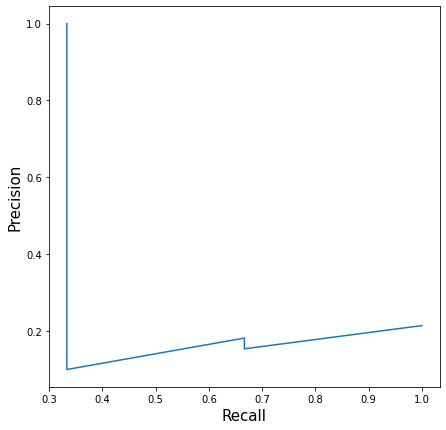

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)

Es muy retador el tratar de elegir un valor que nos de tanto una buena precisiòn como un buen recall

Si el umbral es muy alto, tienes menos verdaderos positivos y muchos falsos negativos. Esto disminuye el recall
Aunque el score de precision sera alto. Si reduces mucho el umbral los falsos negativos incrementan y la precisión disminuye.

Tanto la precision como el recall tienen un rango entre 0 y 1 donde un valor cercano a uno es mejor

#### F1 score, combina la precision y el recall.

$F1$ = $\frac{2TP}{2TP + FP + FN}$

In [18]:
def f1(y_true, y_pred):
    """
    Funcion que calcula el score f1
    :param y_true: lista de valores verdaderos
    :param y_pred: lista de valores predichos
    :return: f1 score
    """

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    score = 2 * p * r / (p + r)

    return score

In [19]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)


0.5714285714285715

In [20]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

In [22]:
# Ratio de verdaderos positivos, es igual al recall que es lo mismo que la sensibilidad
def tpr(y_true, y_pred):
    """
    Funcion para calcular el ratio de los verdaderos positivos
    :param y_true: lista de valores verdaderos
    :param y_pred: lista de valores predichos
    :return: tpr o recall
    """
    return recall(y_true, y_pred)

In [23]:
#Ratio de Falsos positivos
def fpr(y_true, y_pred):
    """
    Funcion para calcular el ratiode falsos positivos
    :param y_true: lista de valores verdaderos
    :param y_pred: lista de valores predichos
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [25]:
#Calculando los ratios
tpr_list = []
fpr_list = []

#valores reales
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

#Probabilidades predichas de que una muestra sea 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

#umbrales
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

#haciendo un loop sobre los umbrales
for thresh in thresholds:
    #calculo las predicciones por cada umbral
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    #calculando tpr
    temp_tpr = tpr(y_true, temp_pred)
    #calculanod fpr
    temp_fpr = fpr(y_true, temp_pred)
    #añadiendo a las listas creadas
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [29]:
import pandas as pd
data = pd.DataFrame({"thresholds": thresholds, "tpr": tpr_list, "fpr": fpr_list})
data.head()

,thresholds,tpr,fpr
0,0.0,1.0,1.0
1,0.1,1.0,0.9
2,0.2,1.0,0.7
3,0.3,0.8,0.6
4,0.4,0.8,0.3


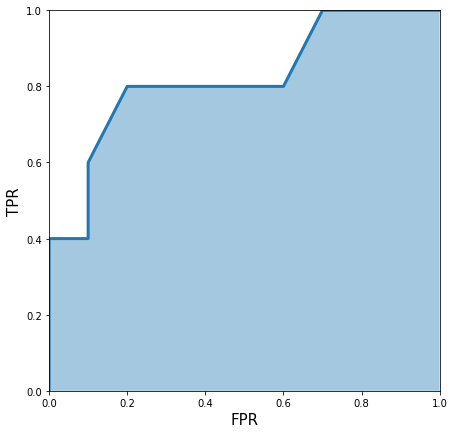

In [30]:
#hacienod una grafica de los datos
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel("FPR", fontsize=15)
plt.ylabel("TPR", fontsize=15)
plt.show()

A esta curva tambien se le conoce como la curva ROC y si calculamos el área bajo la curva, estariamos obteniendo
otra metrica que es muy utilizada si tenemos un set de datos con targets binarios sesgados
y se le conoce como AUC - area debajo de la curva.